In [270]:
# Import the main libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

## Loading the image using CV2

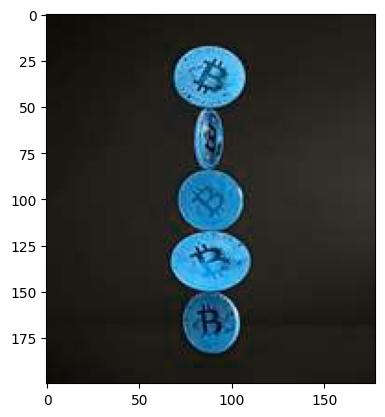

In [272]:
image = cv2.imread('bitss.jpg')
plt.imshow(image)

#### Convert the image to greyscale. This step simplifies the image, since greyscale images contain only intensity information in the form of shades of gray instead of the full colour information in RGB. This way, we reduce the complexity of the data, making it easier to analyse. Moreover, changing the image to greyscale provides with noise reduction and reduces the computational overhead of the three different channels of RGB.

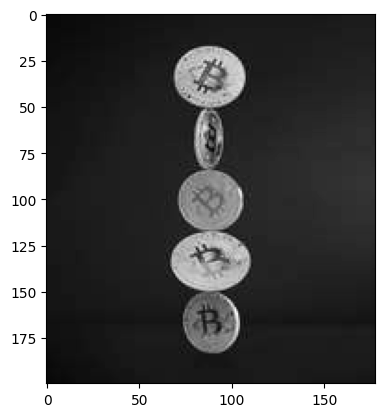

In [274]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

#### We have to detect the edges of the image in order to count the objects. In order to do that, we will make the image blur to avoid noises. Bluring the image before detecting the edges is a common preprocessing step in computer vision, particularly when using edge detection algorithms like the Canny detector that we will use later.

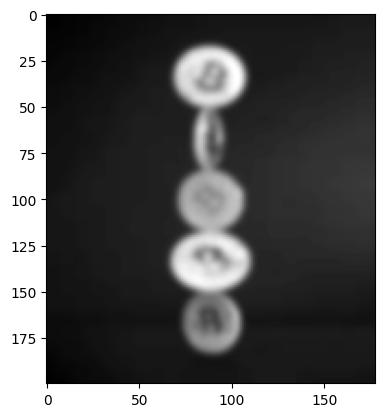

In [276]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap = 'gray')

#### Now we can detect the edges using a canny algorithm. This method compute intensity gradients (the rate of change) of pixel intensities in both the x and y directions by using Sobel filters. From these gradients, the gradient magnitude (strength of the edge) and gradient direction (orientation of the edge) are computed. 

#### After this step, a non-maximum suppression or edge thinning step is performed, refining the detected edges by keeping only the pixels that are local maxima in the gradient magnitude along the gradient direction, thinning the edges and ensuring this way that each edge is represented by a single pixel.

#### Following this step, a double threshold is applied to the data, classifying the edges as strong, weak or non-edges. The high threshold affects pixels with gradient magnitudes above this value, whilst the low threshold affects pixels with gradient magnitudes below this threshold. Finally, pixels within the two thresholds are considered weak edges.

#### The final step in the Canny algorithm performs an edge tracking by hysteresis, which determines which weak edges should be retained based on their connectivity to strong edges. Weak edges connected to strong edges are retained, while weak edges not connected to strong edges are discarded as noise.

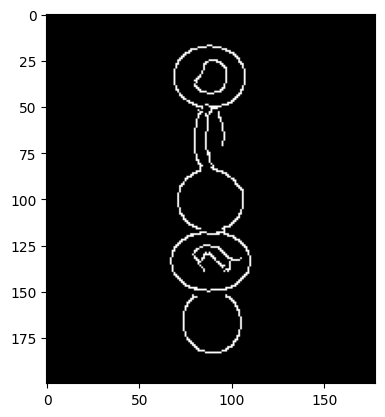

In [278]:
canny = cv2.Canny(blur, 30, 150, 3)  # The 30 and 150 parameters are the threshold values of the Canny algorithm. The last parameter
                                     # is the aperture size for the Sobel operator and determines the size of the Sobel kernel used to 
                                     # compute image gradients (partial derivatives in X and Y directions)
plt.imshow(canny, cmap = 'gray')

#### Sometimes, the edges in the canny image are not connected. In this case it is not necessary, but if the edges were not connected, we could apply a dilate step. The parameters in this code line ensure that the result from the dilation process is the same that the one we have from canny. But if we needed to use it, typical values for the pixel matrix are 3x3 or 5x5 with a number of iterations different from 0.

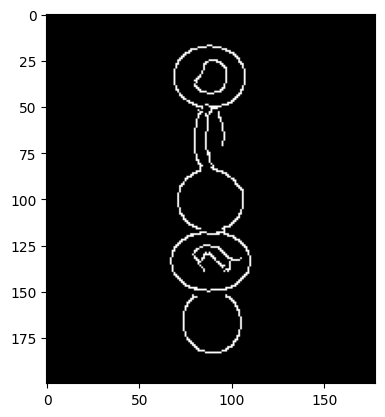

In [280]:
dilated = cv2.dilate(canny, (1, 1), iterations = 0)  # The 1, 1 parameter defines the size and shape of the structuring element used for dilation
                                                     # In this case, 1, 1 means the kernel is a 1x1 matrix (essentially a single pixel). The iteration 
                                                     # parameter is the number of times the dilation operation is applied. Using 0, this process will
                                                     # be skipped, obtaining the same result that we had from the Canny algorithm
plt.imshow(dilated, cmap = 'gray')

#### Now that we have the edges, we need to calculate the contour in the image and convert it into RGB:

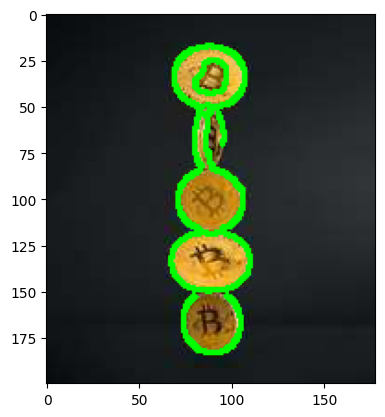

In [282]:
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
plt.imshow(rgb)

In [283]:
print('Number of coins in the image:', len(cnt))

Number of coins in the image: 5


#### Let's try the algorithm with another image

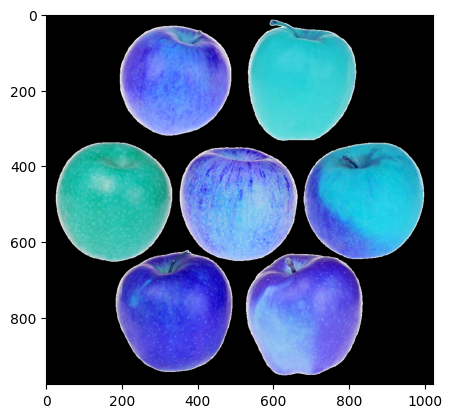

In [285]:
image = cv2.imread('apples.jpg')
plt.imshow(image)

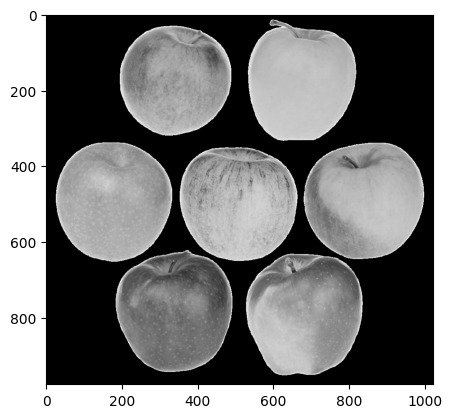

In [286]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

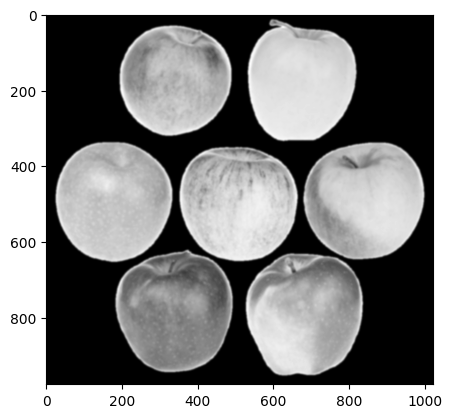

In [287]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap = 'gray')

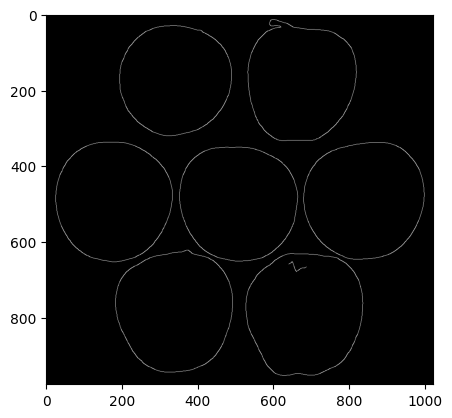

In [317]:
canny = cv2.Canny(blur, 20, 250, 3)
plt.imshow(canny, cmap = 'gray')

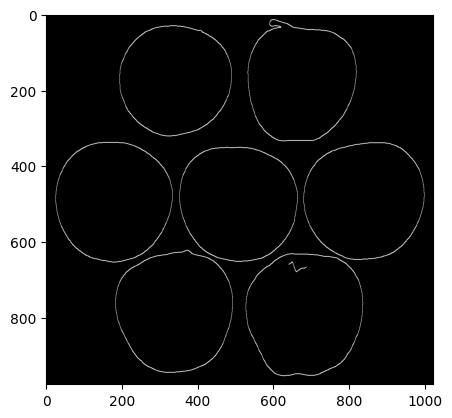

In [321]:
dilated = cv2.dilate(canny, (3, 3), iterations = 1)
plt.imshow(dilated, cmap = 'gray')

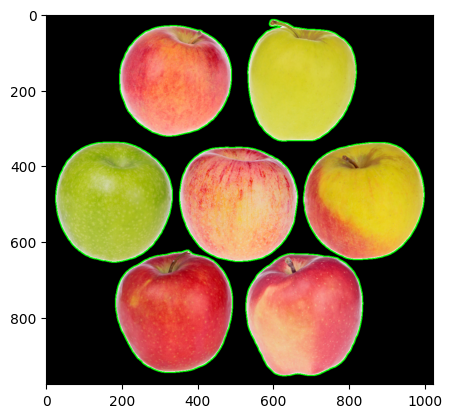

In [323]:
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
plt.imshow(rgb)

In [325]:
print('Number of apples in the image:', len(cnt))

Number of apples in the image: 7
